## Introducion

#### Problem Statement:

The data scientists at BigMart have collected sales data for 1559 products across 10 stores in different cities for the year 2013. Now each product has certain attributes that sets it apart from other products.

#### Breakdown of the Problem Statement:

Supervised machine learning problem.

The target value will be Item_Outlet_Sales.

#### Aim of the NoteBook:

The objective is to create a model that can predict the sales per product for each store. Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

## Importing libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing

#ploting libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msg
from scipy import stats

import warnings# warning filter
warnings.filterwarnings('ignore')



#feature engineering
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

#train test split
from sklearn.model_selection import train_test_split

#metrics
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
from sklearn.model_selection  import cross_val_score as CVS


#ML models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


## Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)

In [2]:
# Load train data set
data=pd.read_csv('../data_sets/big_wart_Train.csv')

# Preprocessing and Data Analysis

## Data Observation

In [3]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
# Size of each data set:
print(f"training set (row, col): {data.shape}")

training set (row, col): (8523, 12)


In [5]:
for i in data.columns:
    print(i,'--',data[i].dtypes,'--',data[i].unique()[:5])

Item_Identifier -- object -- ['FDA15' 'DRC01' 'FDN15' 'FDX07' 'NCD19']
Item_Weight -- float64 -- [ 9.3   5.92 17.5  19.2   8.93]
Item_Fat_Content -- object -- ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Item_Visibility -- float64 -- [0.0160473  0.01927822 0.01676007 0.         0.01274109]
Item_Type -- object -- ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household']
Item_MRP -- float64 -- [249.8092  48.2692 141.618  182.095   53.8614]
Outlet_Identifier -- object -- ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027']
Outlet_Establishment_Year -- int64 -- [1999 2009 1998 1987 1985]
Outlet_Size -- object -- ['Medium' nan 'High' 'Small']
Outlet_Location_Type -- object -- ['Tier 1' 'Tier 3' 'Tier 2']
Outlet_Type -- object -- ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']
Item_Outlet_Sales -- float64 -- [3735.138   443.4228 2097.27    732.38    994.7052]


In [6]:
data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [7]:
data.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}},inplace=True)

In [8]:
data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [9]:
data.duplicated().sum()

0

## Missing values 
There are many ways data can end up with missing values. For example:

The product wasn't weighed.

The data provider didn't include the outlet size of some products.

Most machine learning libraries (including scikit-learn) give an error if you try to build a model using data with missing values. As you can see we have some missing data, let's have a look how many we have for each column:

by numbers

by %

In [10]:
print('number of null values : \n\n',data.isnull().sum())

number of null values : 

 Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [11]:
print('number of null values in percentage% : \n\n',data.isnull().mean()*100)

number of null values in percentage% : 

 Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64


We can see the % of each missing Values per columns is almost identical!


Outlet_Size	28%

Item_Weight	17%

# visualize null values

<AxesSubplot:>

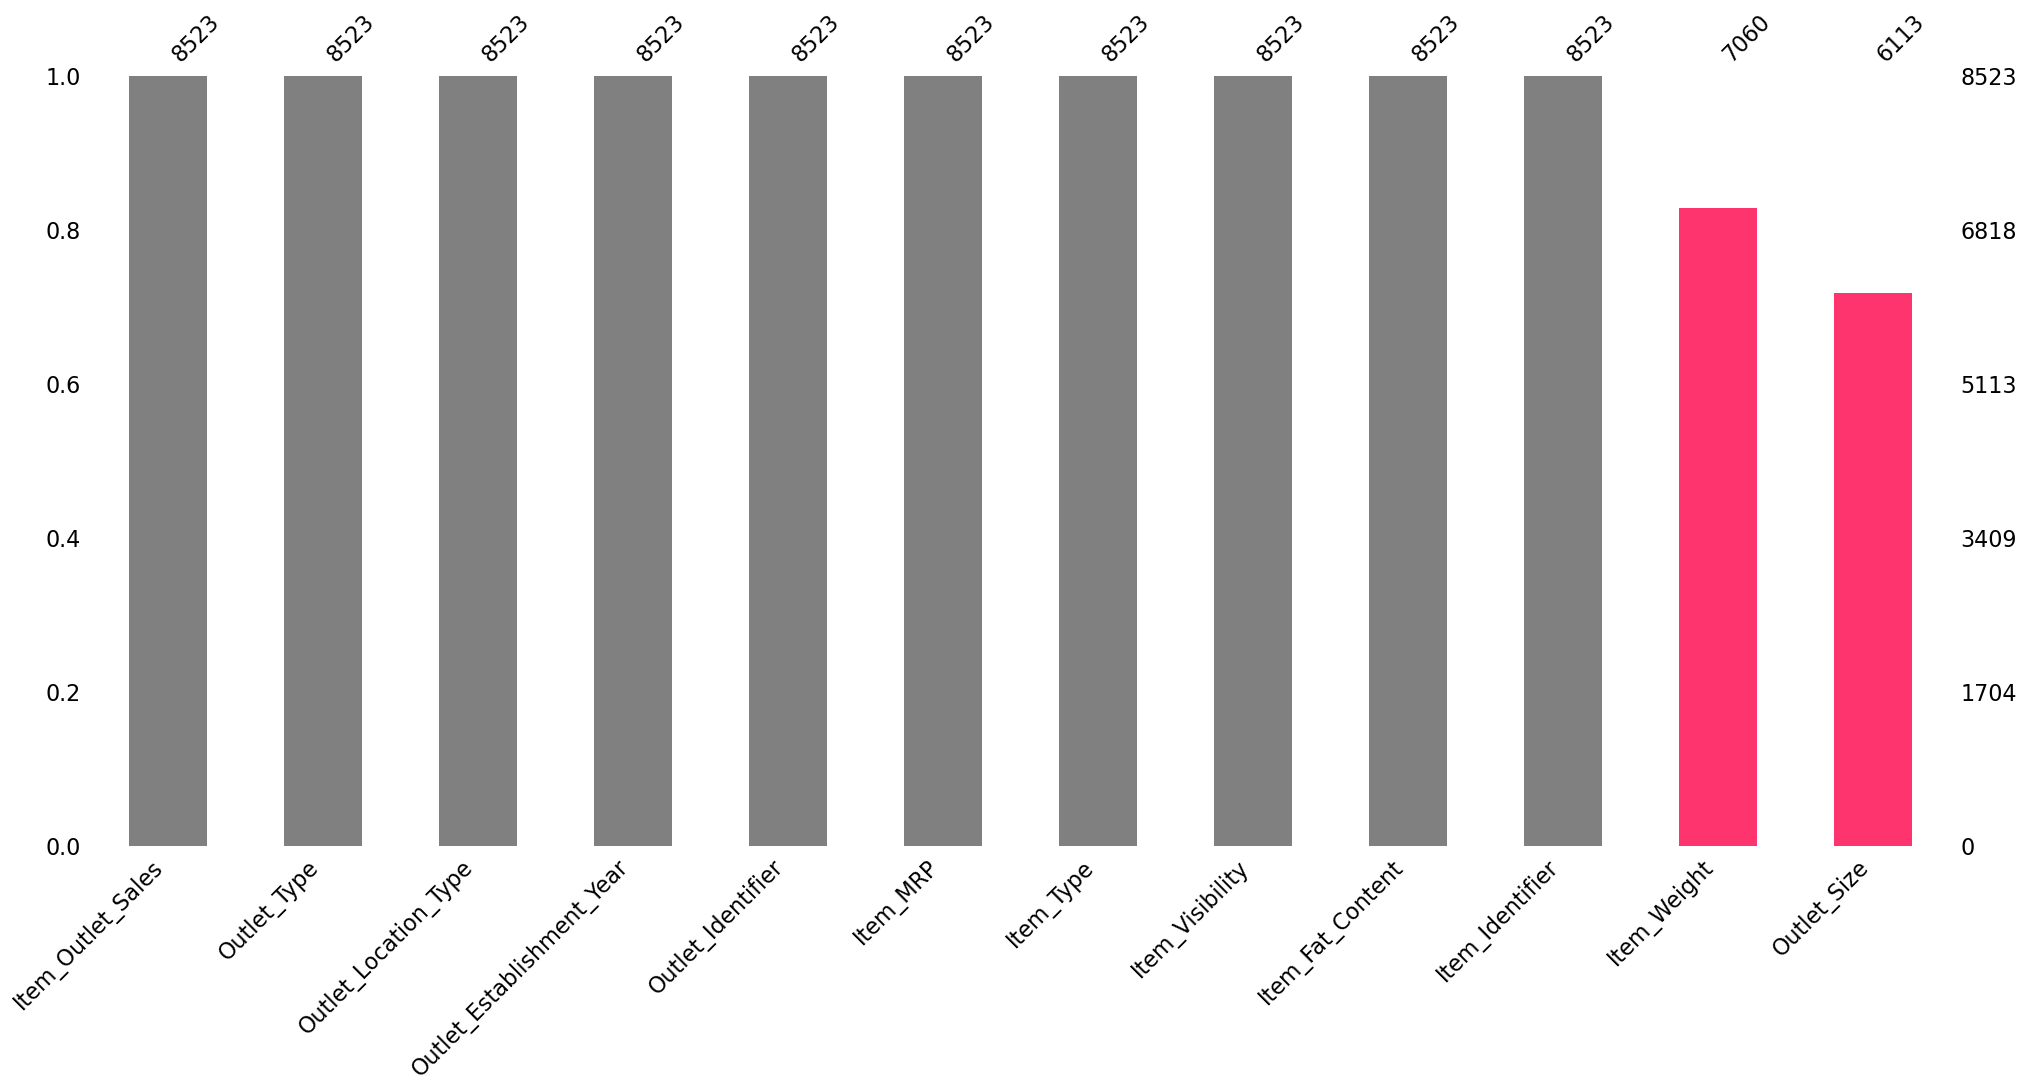

In [12]:
color = ['grey','grey','grey','grey','grey','grey','grey','grey','grey','grey','#fe346e','#fe346e']
msg.bar(data,sort = 'descending',color=color)

<AxesSubplot:>

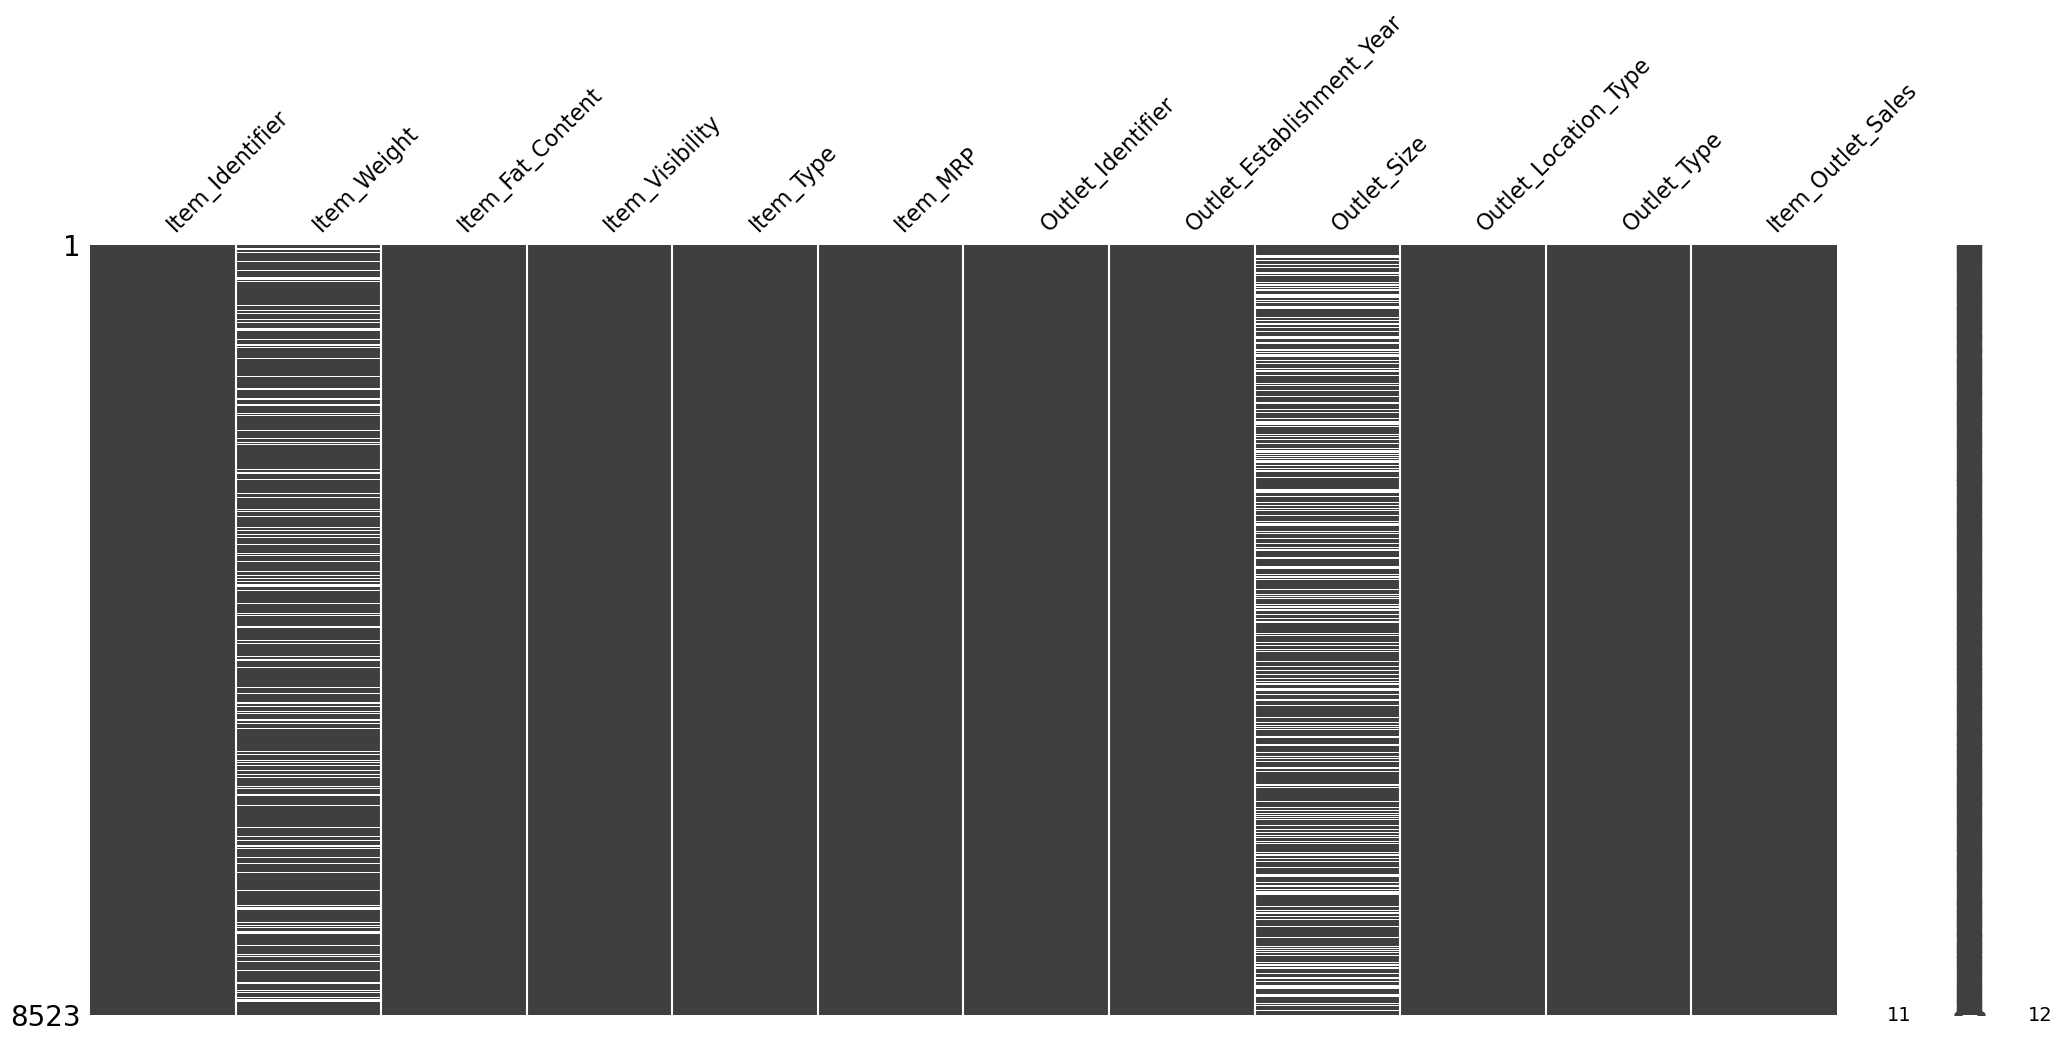

In [13]:

msg.matrix(data)

<AxesSubplot:>

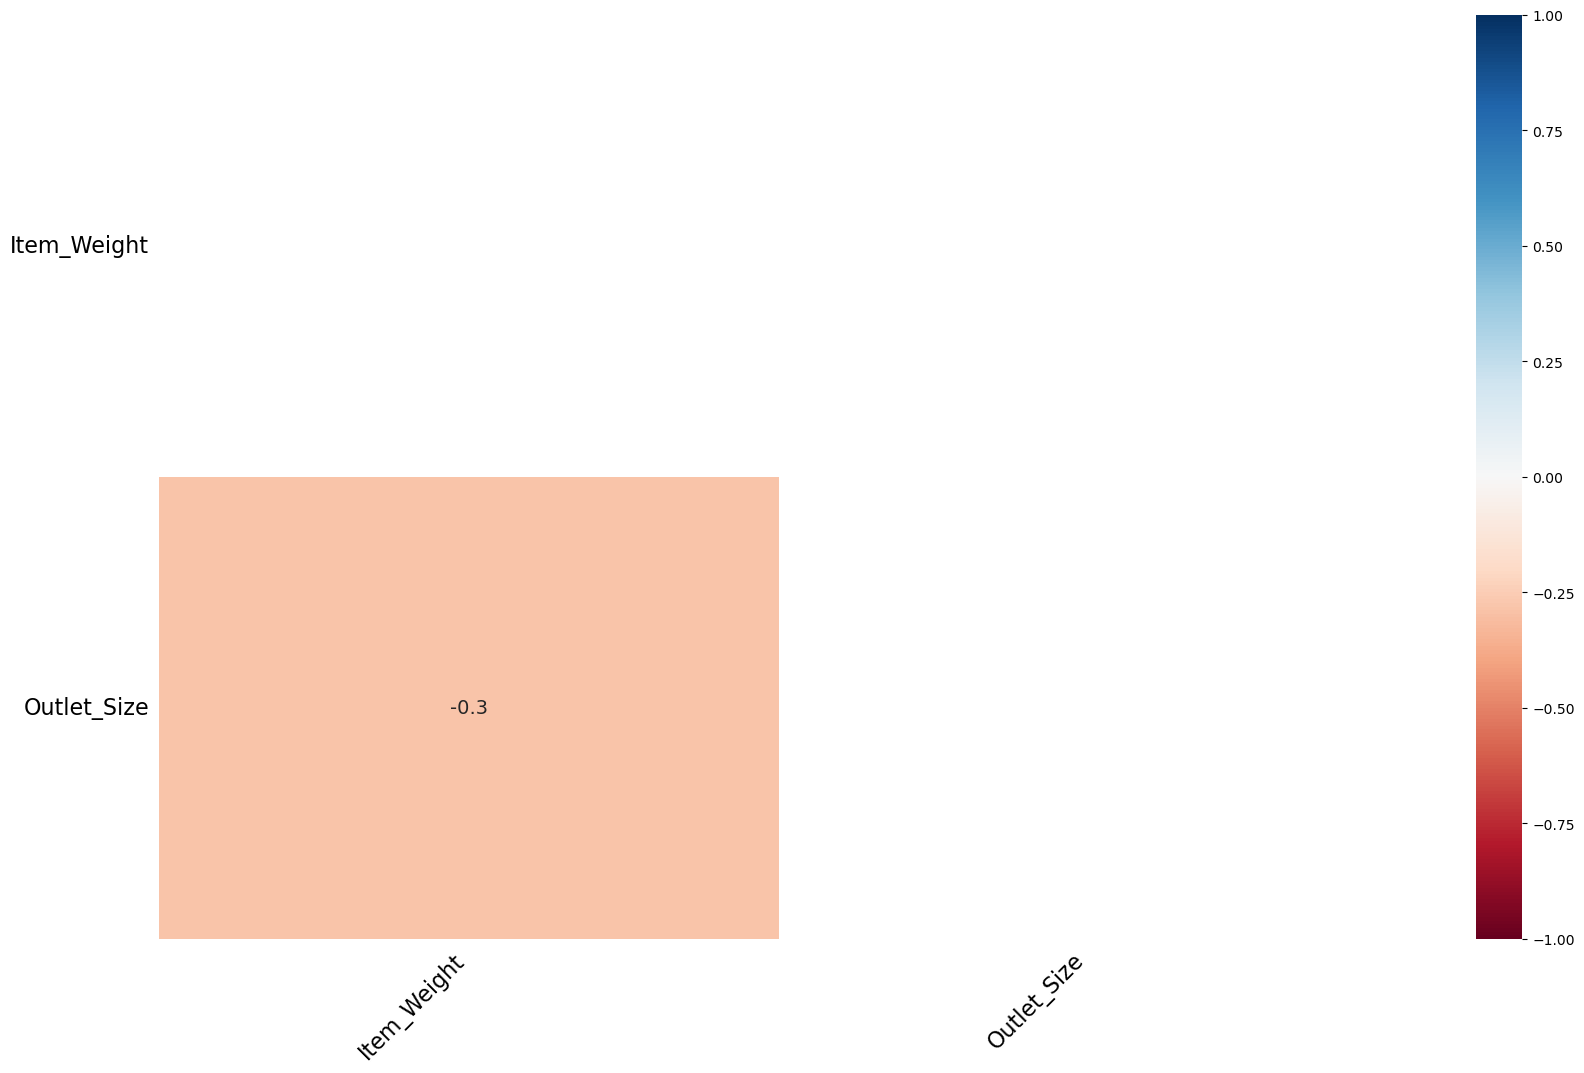

In [14]:
msg.heatmap(data)

Outlet_Size  and Item_Weight negative correlated



###  Let's check the value counts for Outlet_Size :

In [15]:
data['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [16]:
# 'Outlet_Type','Outlet_Size are correlated
data[['Outlet_Type','Outlet_Size']].value_counts().sort_index()

Outlet_Type        Outlet_Size
Grocery Store      Small           528
Supermarket Type1  High            932
                   Medium          930
                   Small          1860
Supermarket Type2  Medium          928
Supermarket Type3  Medium          935
dtype: int64

#### Outlet_Size is a categorical column, therefore we will impute missing values with Medium the mode value

In [17]:
data[data['Outlet_Type']=='Supermarket Type1'].Outlet_Size.mode()[0]

'Small'

In [18]:
s1=data[data['Outlet_Type']=='Supermarket Type1'].Outlet_Size.mode()[0]
s2=data[data['Outlet_Type']=='Supermarket Type2'].Outlet_Size.mode()[0]
s3=data[data['Outlet_Type']=='Supermarket Type3'].Outlet_Size.mode()[0]
g=data[data['Outlet_Type']=='Grocery Store'].Outlet_Size.mode()[0]
s1,s2,s3,g

('Small', 'Medium', 'Medium', 'Small')

In [19]:
def imp(col):
    Type=col[0]
    Size=col[1]
    if pd.isnull(Size):

        if Type=='Supermarket Type1':
            return s1
        elif Type=='Supermarket Type2':
            return s2
        elif Type=='Supermarket Type3':
            return s3
        elif Type=='Grocery Store':
            return g
    else:
            return Size

In [20]:
data['Outlet_Size']=data[['Outlet_Type','Outlet_Size']].apply(imp,axis=1)

In [21]:
data['Outlet_Size'].isnull().sum()

0

In [22]:
data[['Outlet_Type','Outlet_Size']].value_counts().sort_index()

Outlet_Type        Outlet_Size
Grocery Store      Small          1083
Supermarket Type1  High            932
                   Medium          930
                   Small          3715
Supermarket Type2  Medium          928
Supermarket Type3  Medium          935
dtype: int64

In [23]:
#item_weight is a numerical column 

Text(0.5, 1.0, 'Item_Weight Boxplot')

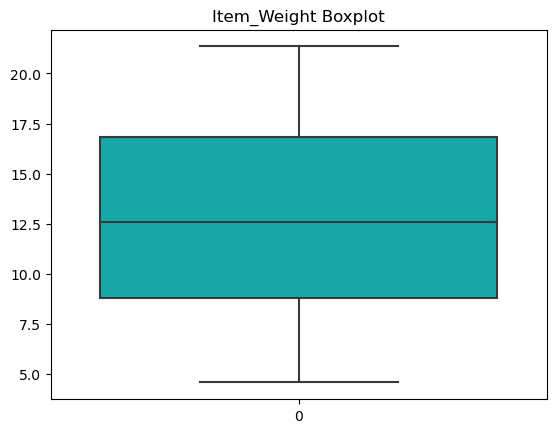

In [24]:
# to visualize it's distribution for a clearer display i will use the boxplot
sns.boxplot(data=data['Item_Weight'],orient="v", color = 'c')
plt.title("Item_Weight Boxplot")

There are no outliers so we will fill the missing data with the mean value for maximum efficiency

In [25]:
# filling the missing values in "Item_weight column" with "Mean" value
data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace=True)

Now we can see check null values .we can see we have filled succesfully all mising the missing data for both sets


In [26]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [27]:
# identify the numerical_features,catgorical_features,discrete_feature,countinue_feature

numerical_features=data.select_dtypes(exclude='object')
catgorical_features=data.select_dtypes(include='object')
discrete_feature=[fea for fea in numerical_features if len(data[fea].unique())<25]
countinue_feature=[fea for fea in numerical_features if fea not in discrete_feature]


In [28]:
# create the function to identify the outliers

def check(df,variable):
    for i in variable :
        plt.figure(figsize=(16,4))

        plt.subplot(1,3,1)
        plt.hist(df[i],bins=30)
        plt.title(i+' histogram')

        plt.subplot(1,3,2)
        stats.probplot(df[i],dist='norm',plot=plt)
        plt.title(i+' Q_Q_plot')

        plt.subplot(1,3,3)
        sns.boxplot(y=df[i])
        plt.title(i+'Box_plot')

        plt.show()

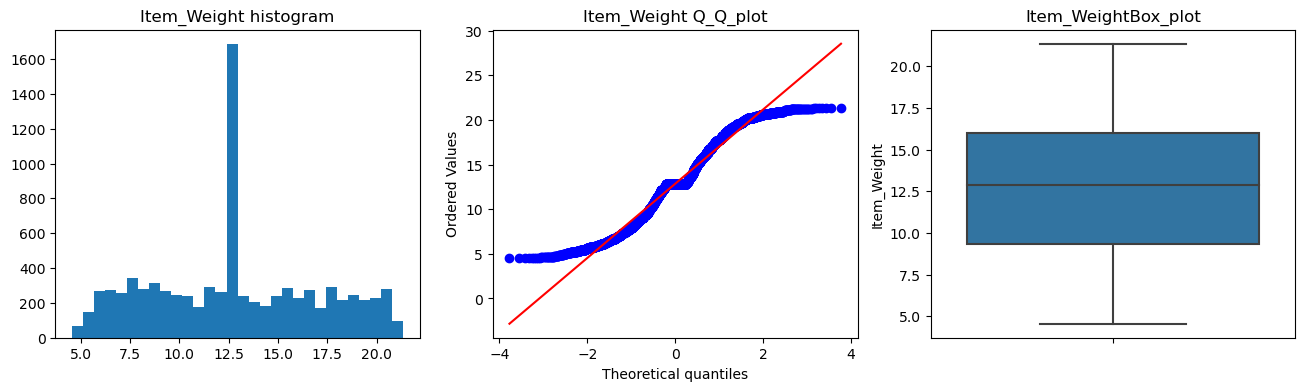

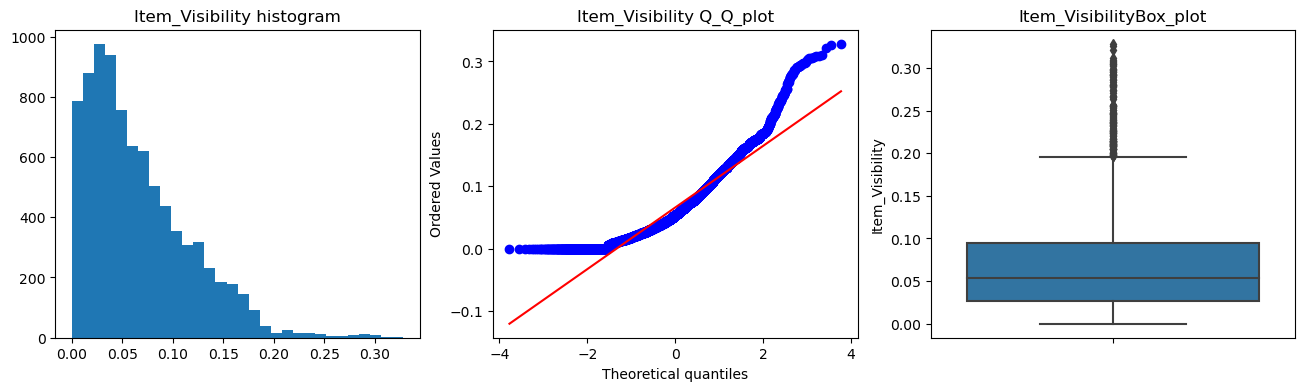

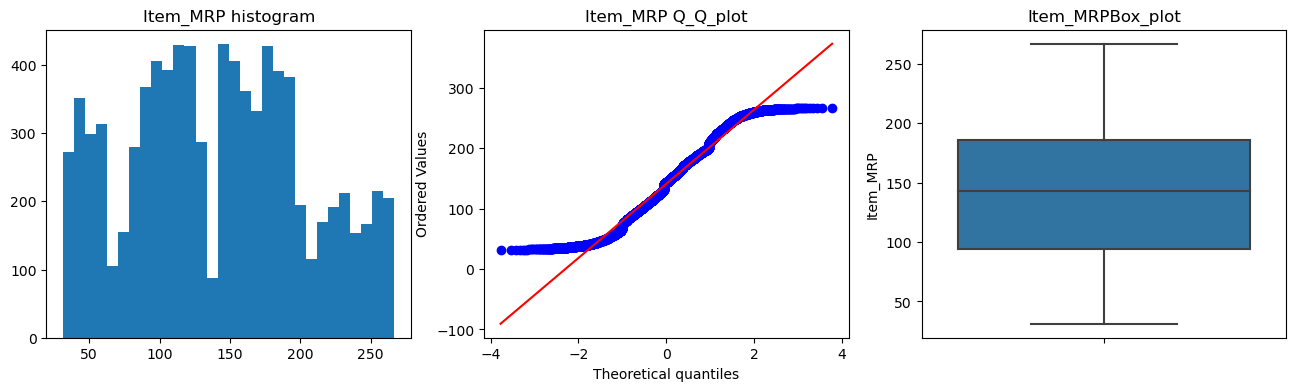

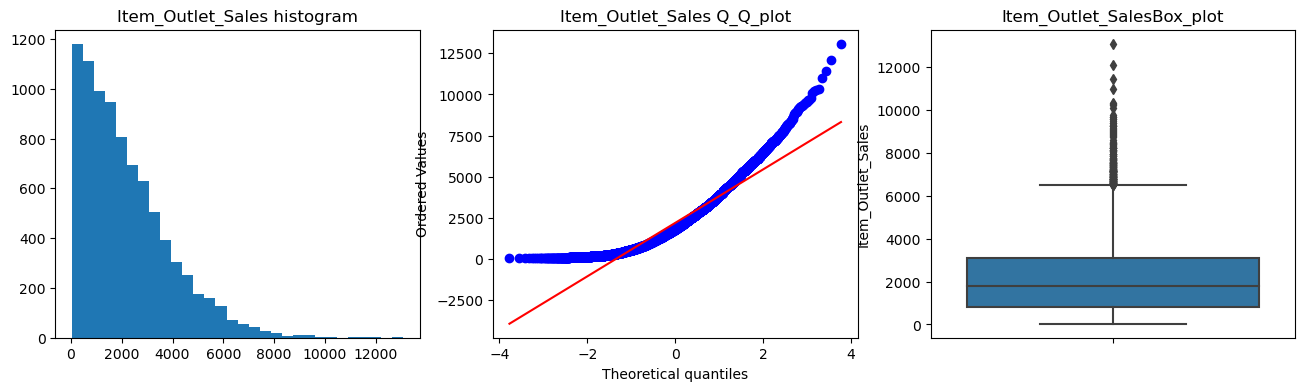

In [29]:
# identify the outliers

check(data,countinue_feature)

Item_Visibility and Item_Outlet_Sales have outliers and right skwed

# Exploratory data analysis (EDA)

### Data Visualization

Univariate Plots

 we will create countplots for the categorical columns:

In [30]:
catgorical_features.shape

(8523, 7)

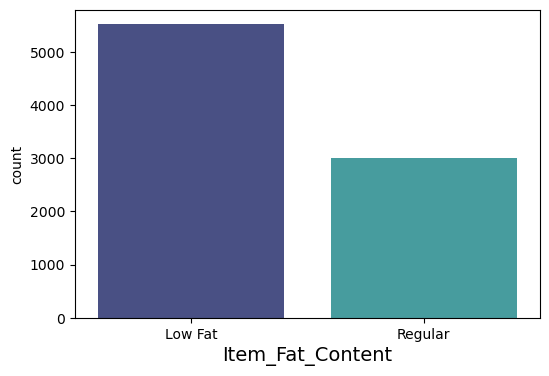

In [31]:
plt.figure(figsize=(6,4))
sns.countplot(x='Item_Fat_Content' , data=data ,palette='mako')
plt.xlabel('Item_Fat_Content', fontsize=14)
plt.show()
        



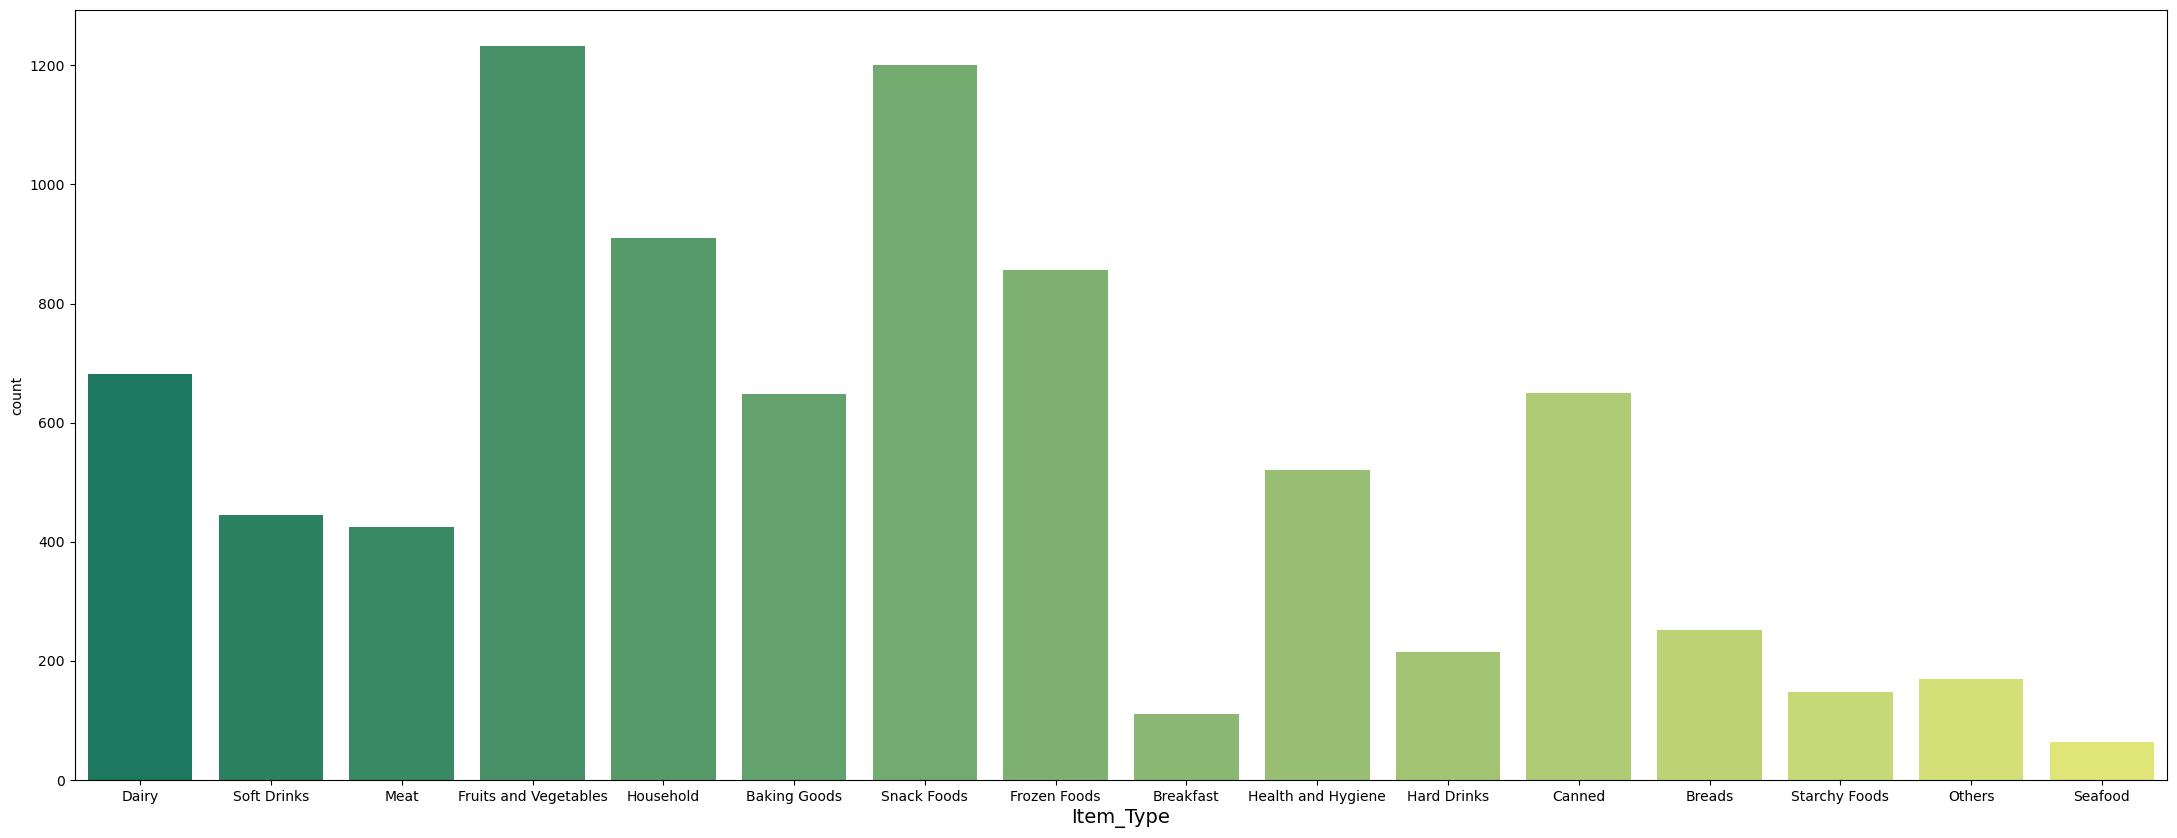

In [32]:
plt.figure(figsize=(27,10))
sns.countplot(x='Item_Type' , data=data ,palette='summer')
plt.xlabel('Item_Type', fontsize=14)
plt.show()

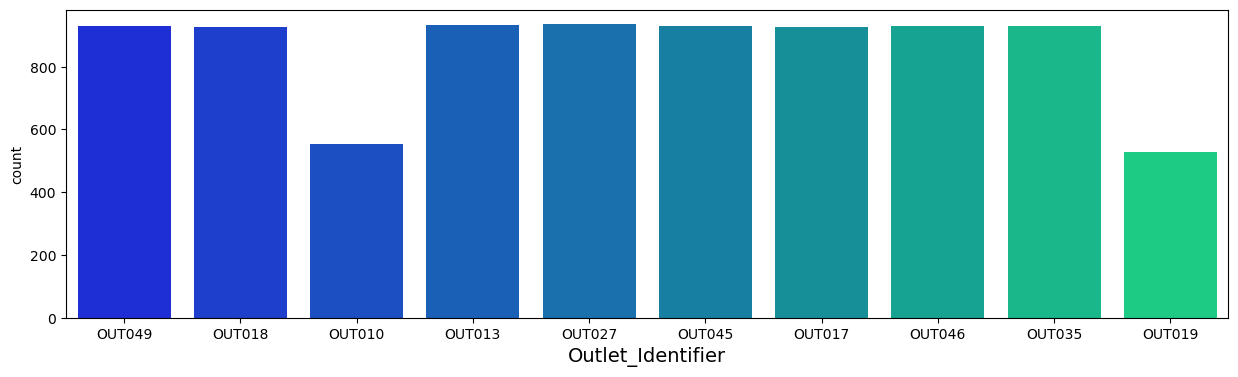

In [33]:
plt.figure(figsize=(15,4))
sns.countplot(x='Outlet_Identifier' , data=data ,palette='winter')
plt.xlabel('Outlet_Identifier', fontsize=14)
plt.show()

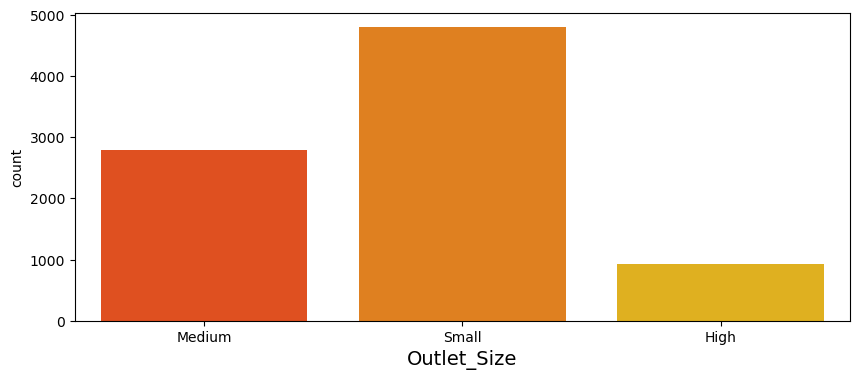

In [34]:
plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Size' , data=data ,palette='autumn')
plt.xlabel('Outlet_Size', fontsize=14)
plt.show()

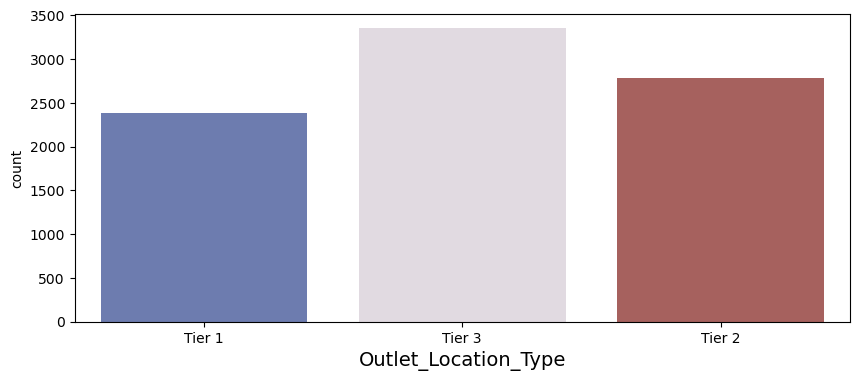

In [35]:
plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Location_Type' , data=data ,palette='twilight_shifted')
plt.xlabel('Outlet_Location_Type', fontsize=14)
plt.show()

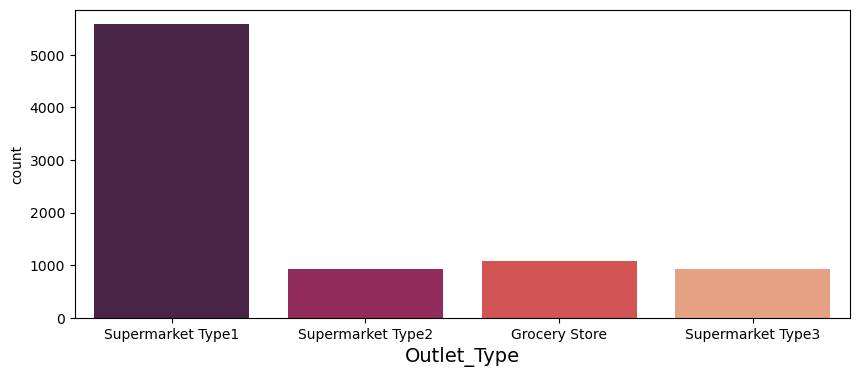

In [36]:
plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Type' , data=data ,palette='rocket')
plt.xlabel('Outlet_Type', fontsize=14)
plt.show()

### Categoric columns realizations

Item_Fat_Content - Most items sold are low fat.

Item_Type - Item types that are distictly popular are fruits and vegetables and snack foods.

Outlet_Identifier - Sold items are ditributed evenly among outlets excluding OUT010 and OUT019 that are significanly lower.

Outlet_Size - Bigmart outlets are mostly medium sized in our data.

Outlet_Location_Type - The most common type is Tier3.

Outlet_Type - By a wide margin the mode outlet type is Supermarket Type1.

#### for the numerical columns:

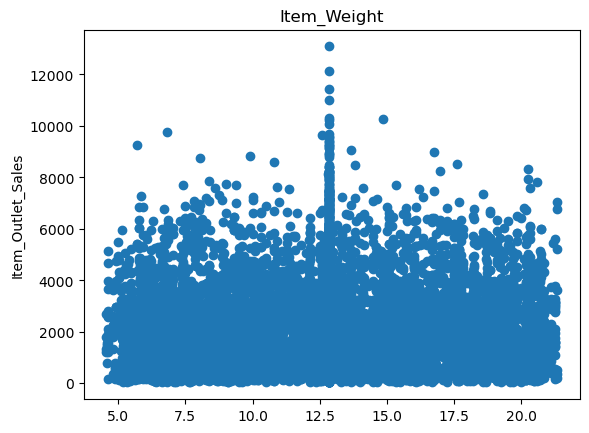

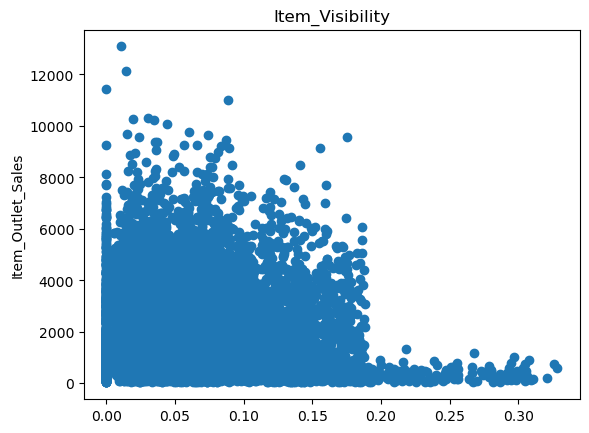

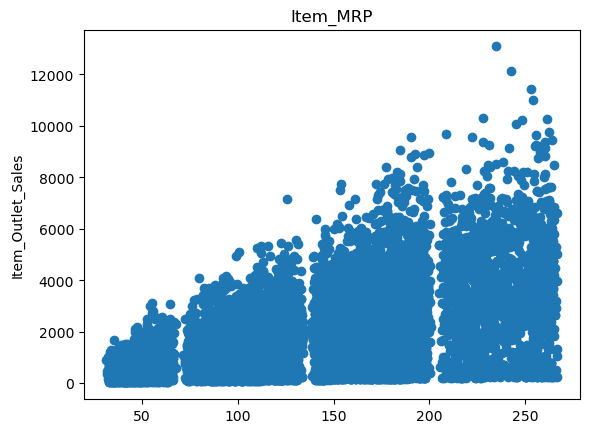

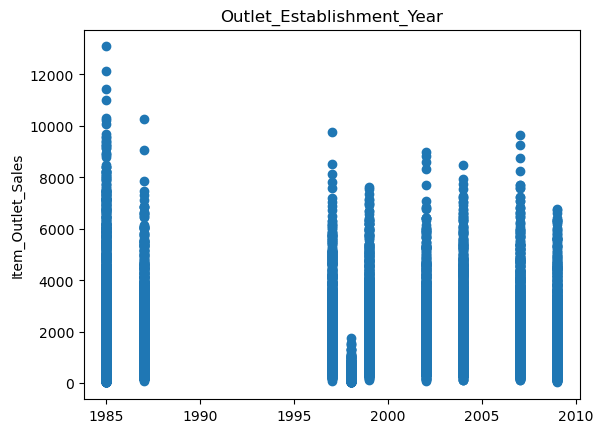

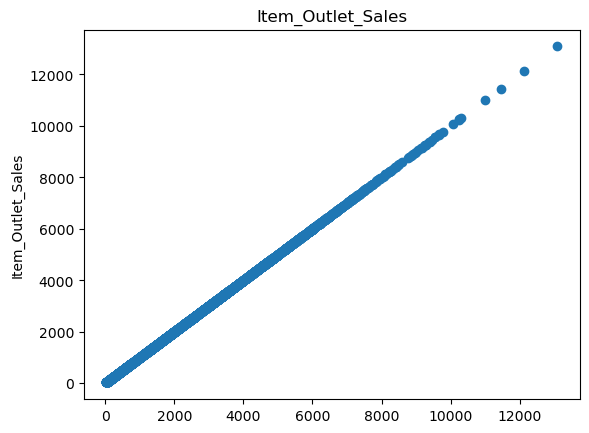

In [37]:
#because of the variability of the unique values of the numeric columns a scatter plot with the target value will be of use
for numeric in numerical_features.columns:
    plt.scatter(data[numeric], data['Item_Outlet_Sales'])
    plt.title(numeric)
    plt.ylabel('Item_Outlet_Sales')
    plt.show()

numeric columns realizations

Item_Weight - The data is very spreaded, no specific pattern.

Item_Visibility - Appears to be spreaded as well but some concentration around the (0,0) indicate small visibility items are not selling well is some cases.

Item_MRP - Items with higher MRP tend to sell better in most cases.

# multivariate plots


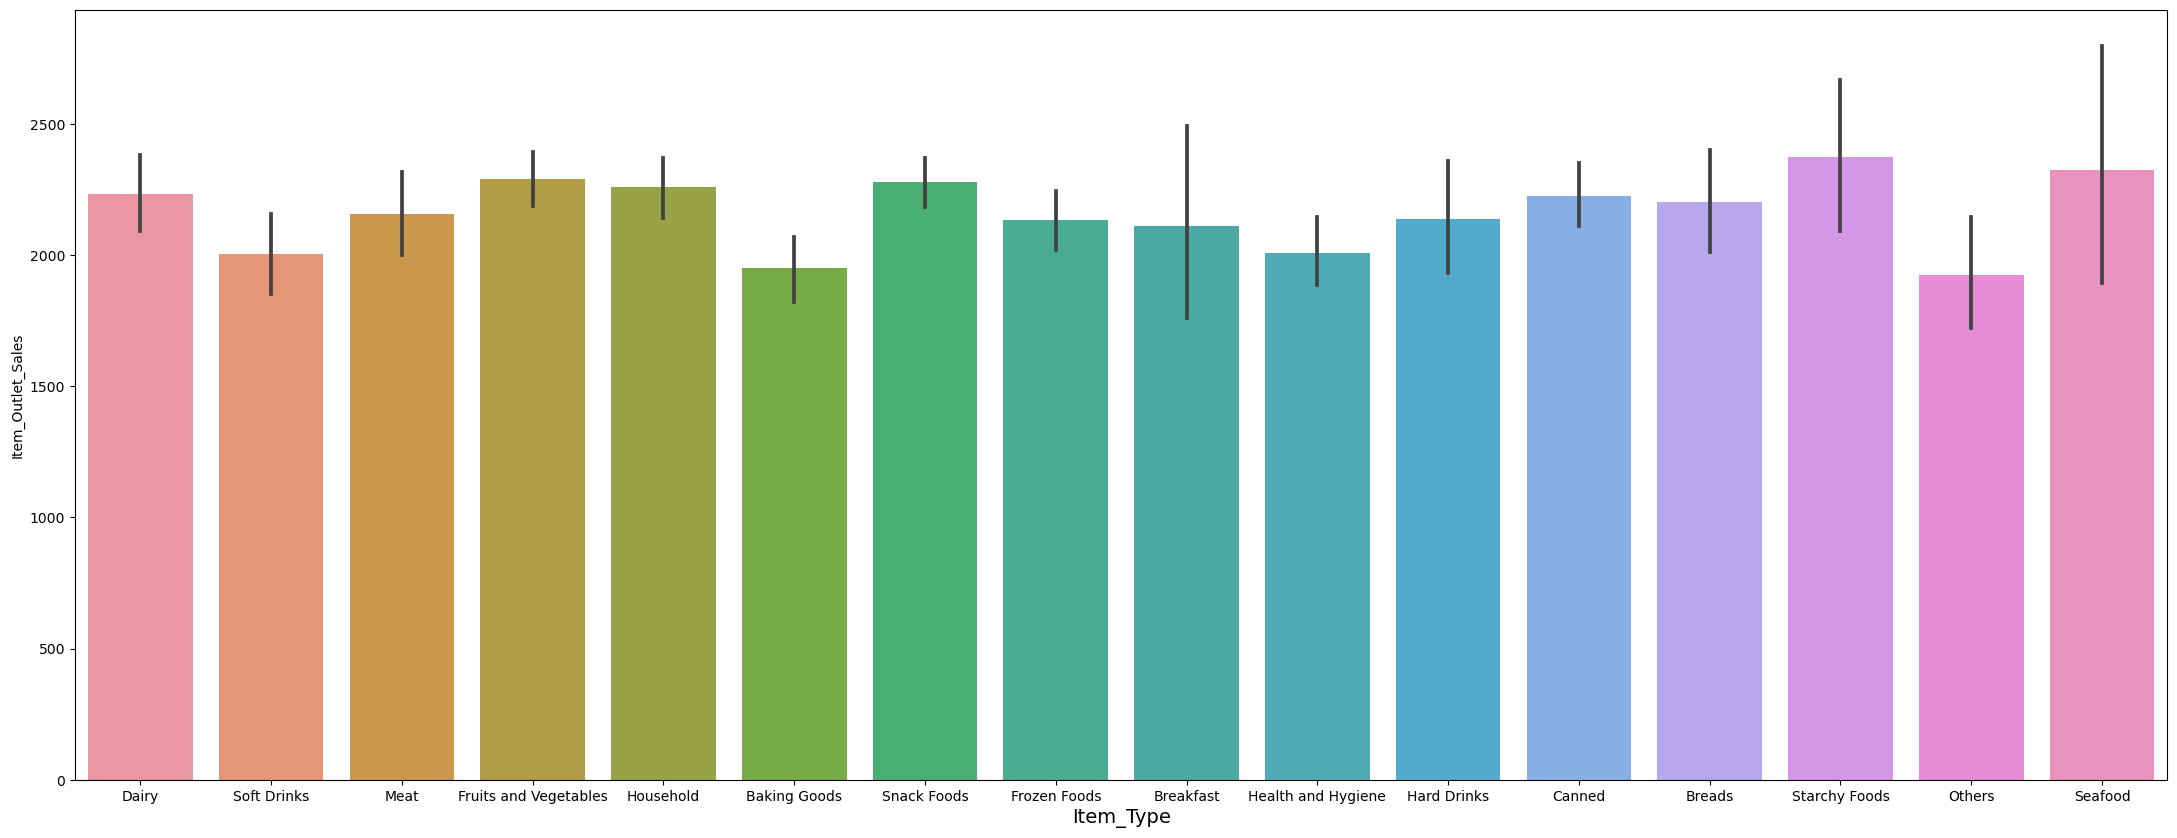

In [38]:
plt.figure(figsize=(27,10))
sns.barplot('Item_Type' ,'Item_Outlet_Sales', data=data )
plt.xlabel('Item_Type', fontsize=14)

plt.show()

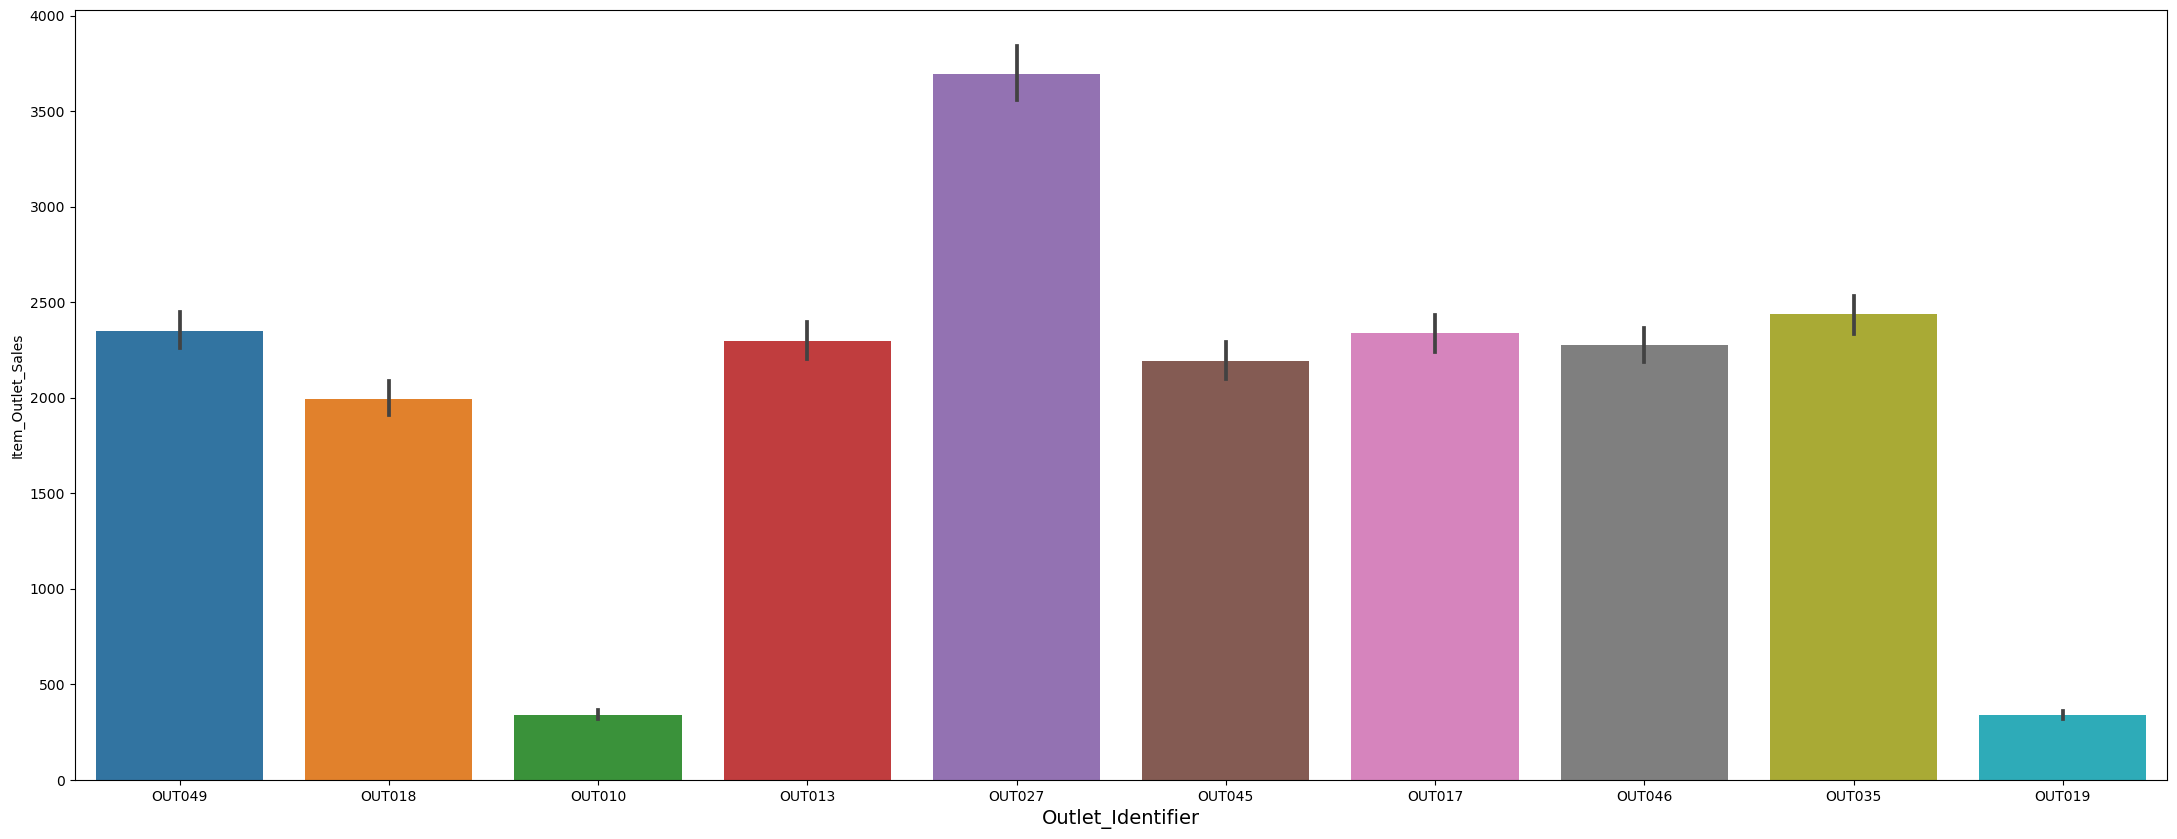

In [39]:
plt.figure(figsize=(27,10))
sns.barplot('Outlet_Identifier' ,'Item_Outlet_Sales', data=data )
plt.xlabel('Outlet_Identifier', fontsize=14)

plt.show()

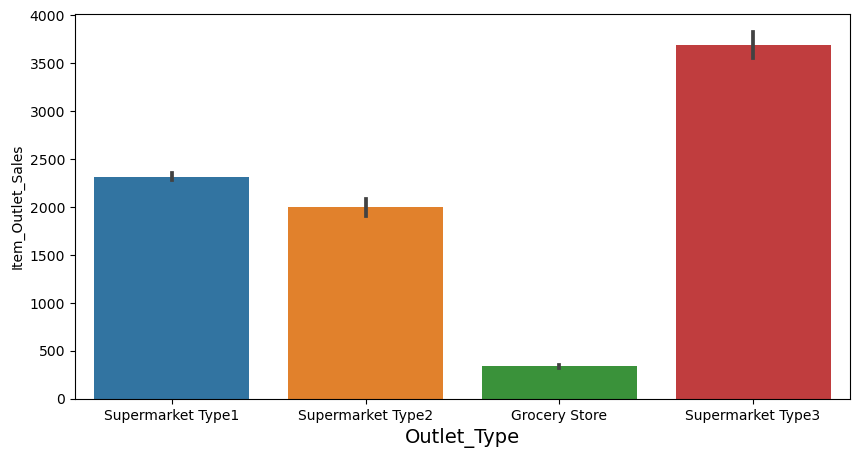

In [40]:
plt.figure(figsize=(10,5))
sns.barplot('Outlet_Type' ,'Item_Outlet_Sales', data=data )
plt.xlabel('Outlet_Type', fontsize=14)

plt.show()

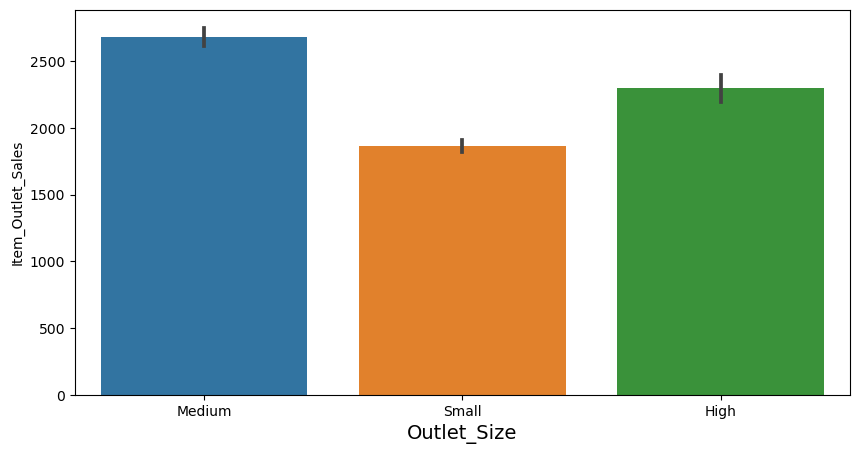

In [41]:
plt.figure(figsize=(10,5))
sns.barplot('Outlet_Size' ,'Item_Outlet_Sales', data=data )
plt.xlabel('Outlet_Size', fontsize=14)

plt.show()

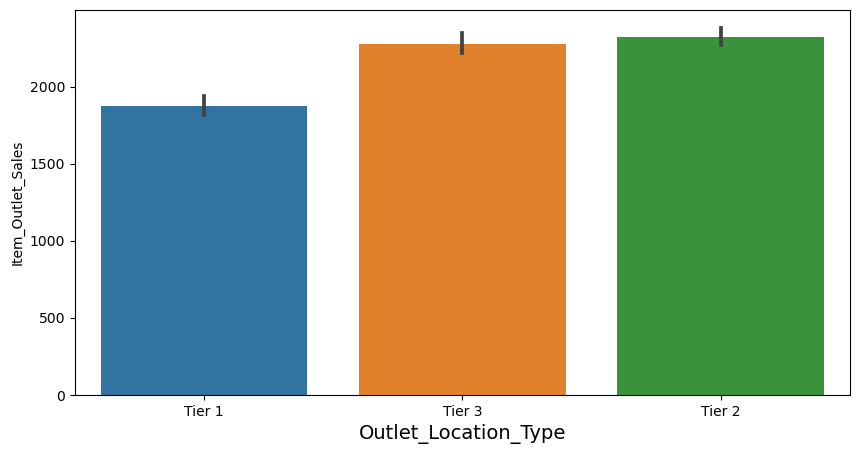

In [42]:
plt.figure(figsize=(10,5))
sns.barplot('Outlet_Location_Type' ,'Item_Outlet_Sales', data=data )
plt.xlabel('Outlet_Location_Type', fontsize=14)

plt.show()

### Observation :
The difference in item types by sales is very small.

Outlet 27 is the most profitable and there is a big diffrence between each specific outlet sales.

Suprisingly supermarket type 3 is the most profitable and not type 1.

Medium and high outlet sizes are pretty much even in sales.

Tier 2 and 3 are almost even being the highest in sales (2 is slightly larger).

<AxesSubplot:>

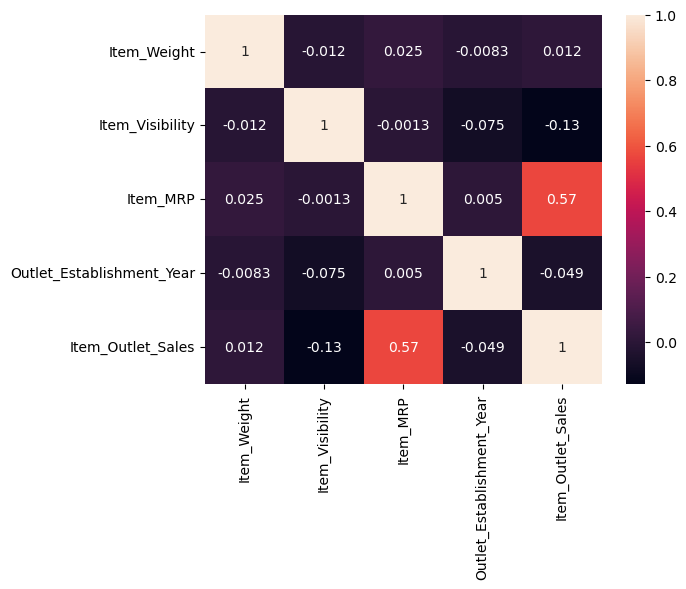

In [44]:
#Corraltion Matrix
sns.heatmap(data.corr() ,cmap='rocket',annot=True)

#### We can see Item_Outlet_Sales is highly correlated with Item_MRP

### apply log trans formation to skew data for normal distibution

In [45]:
for i in countinue_feature:
    data[i]=np.log(data[i]+1)



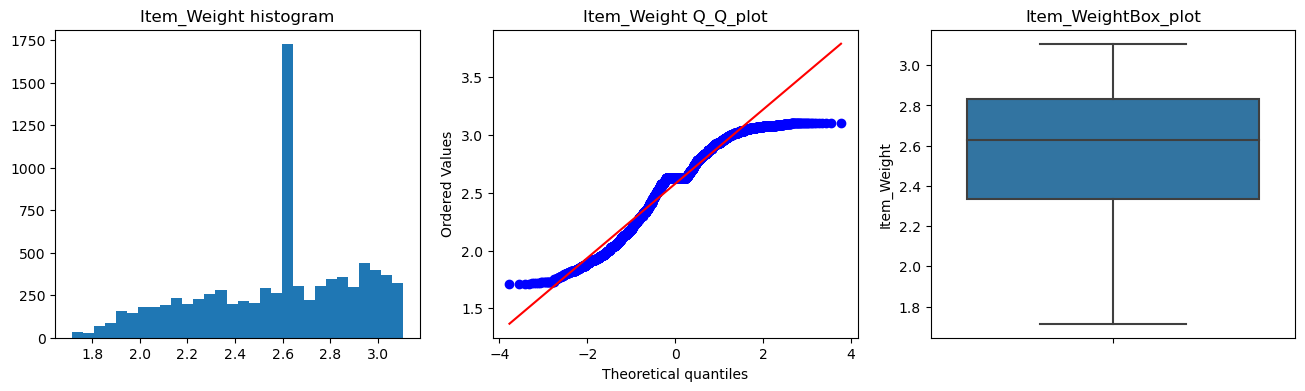

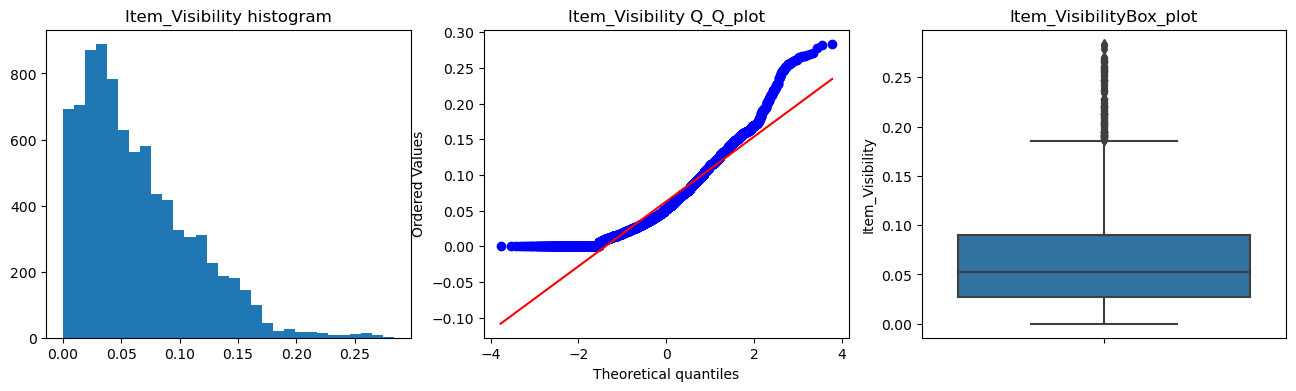

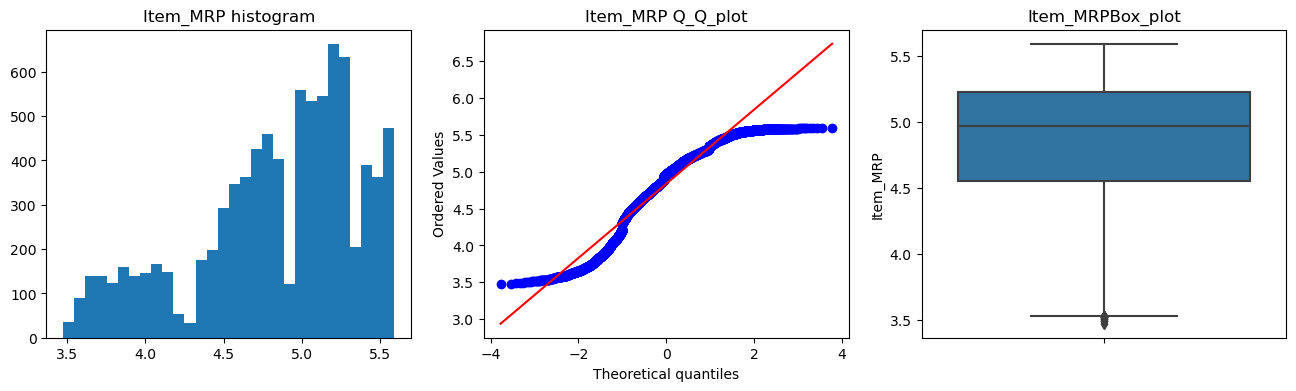

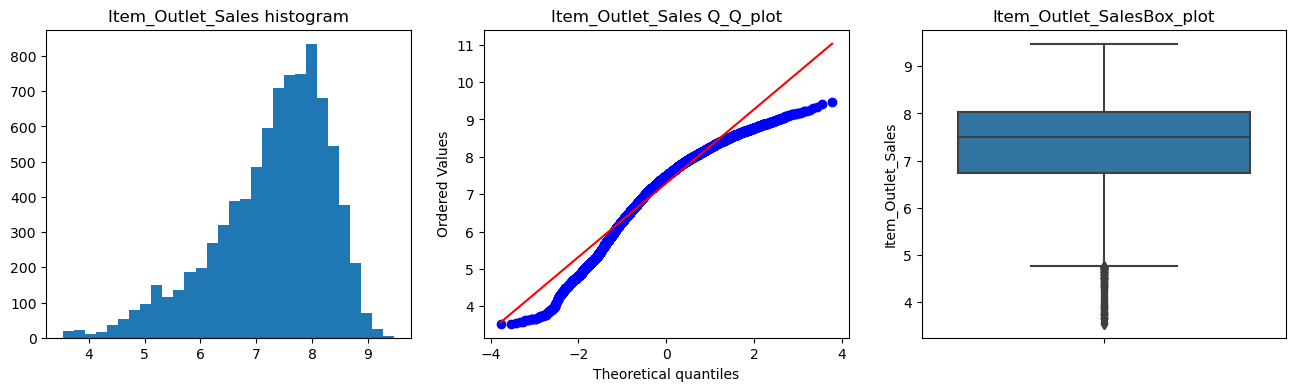

In [46]:

check(data,countinue_feature)

The columns Outlet_Establishment_Year, Item_Identifier and 

Outlet_Identifier don't have significant values so we will drop them.

All Ordinal variables will be Label encoded.

The columns Outlet_Type and Item_Type will be One Hot encoded.

In [47]:
# Dropping irrelevant columns

data  = data.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Type','Item_Type'],axis=1)


#### lable encoding

In [48]:
from sklearn.preprocessing import LabelEncoder

In [49]:
encoder = LabelEncoder()
for i in data.select_dtypes(include='object'):
    data[i]=encoder.fit_transform(data[i])

In [50]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1:]
x

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type
0,2.332144,0,0.015920,5.524692,1,0
1,1.934416,1,0.019095,3.897299,1,2
2,2.917771,0,0.016621,4.960170,1,0
3,3.005683,1,0.000000,5.210005,2,2
4,2.295560,0,0.000000,4.004810,0,2
...,...,...,...,...,...,...
8518,2.062423,0,0.055230,5.373062,0,2
8519,2.238580,1,0.045912,4.692787,2,1
8520,2.451005,0,0.034581,4.455770,2,1
8521,2.105353,1,0.135597,4.645671,1,2


### Machine learning model



First of all we will divide our dataset into two variables X as the features we defined earlier and y as the Item_Outlet_Sales the target value we want to predict.

Assumptions:

This is a regression problem so we will use Regression methods.

Train test split will be a 8:2 ratio respectively.

#### scaling

In [51]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

Random forest is a Supervised Learning algorithm which uses ensemble learning method for classification and regression. It operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees (more info on medium).

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn. metrics import r2_score,mean_absolute_error,mean_squared_error
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=22)




x_train = pd.DataFrame(sc.fit_transform(x_train), columns = x_train.columns)
x_test = pd.DataFrame(sc.fit_transform(x_test), columns = x_test.columns)




In [58]:
#model
model=RandomForestRegressor(n_estimators=100)
#fit
model.fit(x_train,y_train)


print(f" train set Score : {model.score(x_train,y_train)}\n")

 train set Score : 0.9571366889136036



In [63]:
#predict
preds=model.predict(x_test)
#score variables
RFR_MAE = round(MAE(y_test, preds),2)
RFR_MSE = round(MSE(y_test, preds),2)
RFR_R_2 = round(R2(y_test, preds),4)

print(f" Mean Absolute Error: {RFR_MAE}\n")
print(f" Mean Squared Error: {RFR_MSE}\n")
print(f" R^2 Score: {RFR_R_2}\n")


 Mean Absolute Error: 0.18

 Mean Squared Error: 0.05

 R^2 Score: 0.9501

